In [102]:
import numpy as np
import pandas as pd
import tensorflow as tf 
from tensorflow import keras
# print(tf.__version__)
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [103]:
iris = pd.read_csv('dataset/iris.csv')
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [104]:
X = iris.iloc[:, 0:4]
y = iris.iloc[:, 4]
print(X.shape, y.shape)

(150, 4) (150,)


In [105]:
# Get unique target values
categoreis= np.unique(y)
categoreis
# y = keras.utils.to_categorical(y)

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [106]:
# Initialize the LabelEncoder
encoder = LabelEncoder()

# Fit and transform
encoded_labels = encoder.fit_transform(y)

#Output 
encoded_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [107]:
y = keras.utils.to_categorical(encoded_labels)
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [108]:
y.shape

(150, 3)

In [109]:
#Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=9, stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(120, 4) (120, 3)
(30, 4) (30, 3)


In [110]:
X_train.sample(10)

,sepal.length,sepal.width,petal.length,petal.width
20,5.4,3.4,1.7,0.2
90,5.5,2.6,4.4,1.2
86,6.7,3.1,4.7,1.5
89,5.5,2.5,4.0,1.3
7,5.0,3.4,1.5,0.2
87,6.3,2.3,4.4,1.3
27,5.2,3.5,1.5,0.2
48,5.3,3.7,1.5,0.2
124,6.7,3.3,5.7,2.1
14,5.8,4.0,1.2,0.2


In [111]:
X_test.sample(10)

,sepal.length,sepal.width,petal.length,petal.width
133,6.3,2.8,5.1,1.5
148,6.2,3.4,5.4,2.3
54,6.5,2.8,4.6,1.5
22,4.6,3.6,1.0,0.2
149,5.9,3.0,5.1,1.8
2,4.7,3.2,1.3,0.2
57,4.9,2.4,3.3,1.0
18,5.7,3.8,1.7,0.3
100,6.3,3.3,6.0,2.5
46,5.1,3.8,1.6,0.2


# Scaling data by Standardad Scaler 

In [112]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

In [113]:
X_train[1]

array([0.68625788, 0.1128703 , 0.99937683, 0.79369554])

In [114]:
X_test[1]


array([-1.43589658,  1.40961448, -1.56657226, -1.32110964])

# Build the model

In [115]:
#Define a model 
model = Sequential()

# Add the first hidden layer with 10 neurons and 'relu' activation
model.add(Dense(10, activation='relu',input_shape=(4,)))# Replace 4 with the number of input features number of 3 plus 1 (3+1)

# Add the second hidden layer with 10 neurons and 'relu' activation
model.add(Dense(10, activation='relu',))

#Add a Dropuot layer with a rate of 0.5
model.add(Dropout(0.5))

#Add the output layer with 'softmax' activation
model.add(Dense(3, activation='softmax')) # Replace 3 with the number of classes

/home/m-fayzi/Desktop/Deep_Learning/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [116]:
# Adam optimizer with learning rate of 0.001
optimizer = Adam(learning_rate=0.001)

# Compile model 
model.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])


In [117]:
# Display the model summary
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

In [118]:
# Define Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor
    patience=5,          # Number of epochs to wait
    restore_best_weights=True  # Restore the best weights
)

In [119]:
# Model the Fit
train_model = model.fit(X_train, y_train, batch_size=5, epochs=200, validation_split=0.2,callbacks=[early_stopping])

Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3241 - loss: 1.2749 - val_accuracy: 0.4167 - val_loss: 1.3506
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2668 - loss: 1.2758 - val_accuracy: 0.4167 - val_loss: 1.2573
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3056 - loss: 1.2073 - val_accuracy: 0.4583 - val_loss: 1.1865
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4072 - loss: 1.0847 - val_accuracy: 0.5000 - val_loss: 1.1375
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5275 - loss: 0.9847 - val_accuracy: 0.4167 - val_loss: 1.0940
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4369 - loss: 1.0997 - val_accuracy: 0.5417 - val_loss: 1.0489
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4546 - loss: 1.0135 - val_accuracy: 0.5417 - val_loss: 0.9997
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4530 - loss: 0.9972 - val_accuracy: 0.5417 - 

In [120]:
# Access the keys of the history object
print(train_model.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [121]:
print('Accuracy:', np.max(train_model.history['accuracy']))
print('Validation Accuracy:', np.max(train_model.history['val_accuracy']))

print('Loss:',np.max(train_model.history['loss']))
print('Validation Loss:',np.max(train_model.history['val_loss']))


Accuracy: 0.9583333134651184
Validation Accuracy: 0.9166666865348816
Loss: 1.316055417060852
Validation Loss: 1.3506234884262085


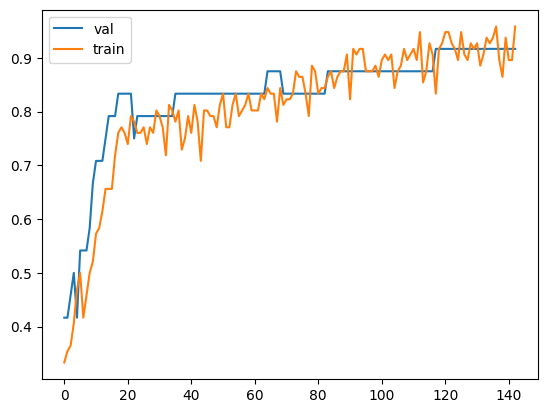

In [122]:
# Plot 
plt.plot(train_model.history['val_accuracy'])
plt.plot(train_model.history['accuracy'])
plt.legend(['val', 'train'])

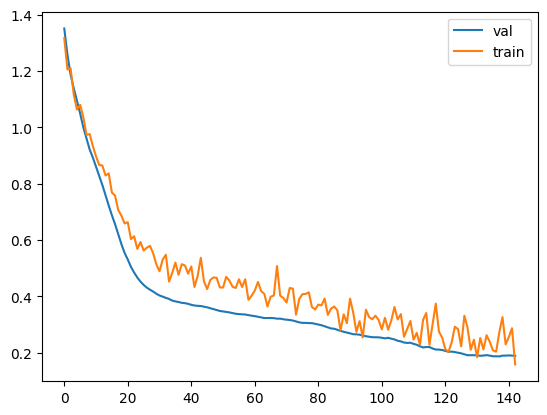

In [123]:
plt.plot(train_model.history['val_loss'])
plt.plot(train_model.history['loss'])
plt.legend(['val', 'train'])

# Model evaluation on test data

In [124]:
loss , accuracy = model.evaluate(X_test, y_test)
print('loss:', loss)
print('Accuracy:', accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9000 - loss: 0.3893
loss: 0.38930797576904297
Accuracy: 0.8999999761581421


In [125]:
predicted= model.predict(X_test).argmax(axis=1)
y_pred = keras.utils.to_categorical(predicted)
print('Predicted Label:', y_pred)
print('True Label:', y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted Label: [[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]
True Label: [[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [126]:
# y_pred == y_test
np.mean(y_pred == y_test)

np.float64(0.9333333333333333)